In [4]:
!pip install matplotlib numpy scipy pandas jupyter notebook

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# Irradiance Trace Visualization

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Dec 29 12:26:39 2020', '__version__': '1.0', '__globals__': [], 'Gmonth': array([[0.00000000e+00, 0.00000000e+00],
       [9.00000000e+02, 6.76852745e+01],
       [1.80000000e+03, 7.77214440e+01],
       ...,
       [7.73460000e+06, 0.00000000e+00],
       [7.73550000e+06, 0.00000000e+00],
       [7.73640000e+06, 0.00000000e+00]], shape=(4770, 2))}
Shape: (4770, 2)
Timestamp:
[0.0000e+00 9.0000e+02 1.8000e+03 ... 7.7346e+06 7.7355e+06 7.7364e+06]
Irradiance:
[ 0.         67.68527452 77.72144401 ...  0.          0.
  0.        ]


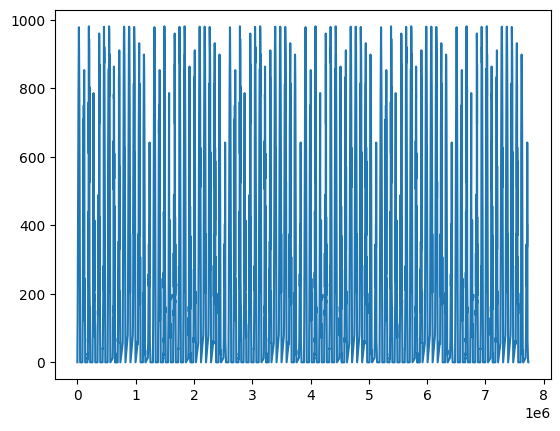

In [6]:
# Load the .mat file
mat_file = scipy.io.loadmat('gmonths.mat')

# Display the contents of the .mat file
print(mat_file)  # -> dict
print(f"Shape: {mat_file['Gmonth'].shape}")
timestamp = mat_file['Gmonth'][:, 0]  # [s]
irradiance = mat_file['Gmonth'][:, 1]  # [W/m^2]
print(f"Timestamp:\n{timestamp}")
print(f"Irradiance:\n{irradiance}")

# Plot
fig, ax = plt.subplots()
ax.plot(timestamp, irradiance)

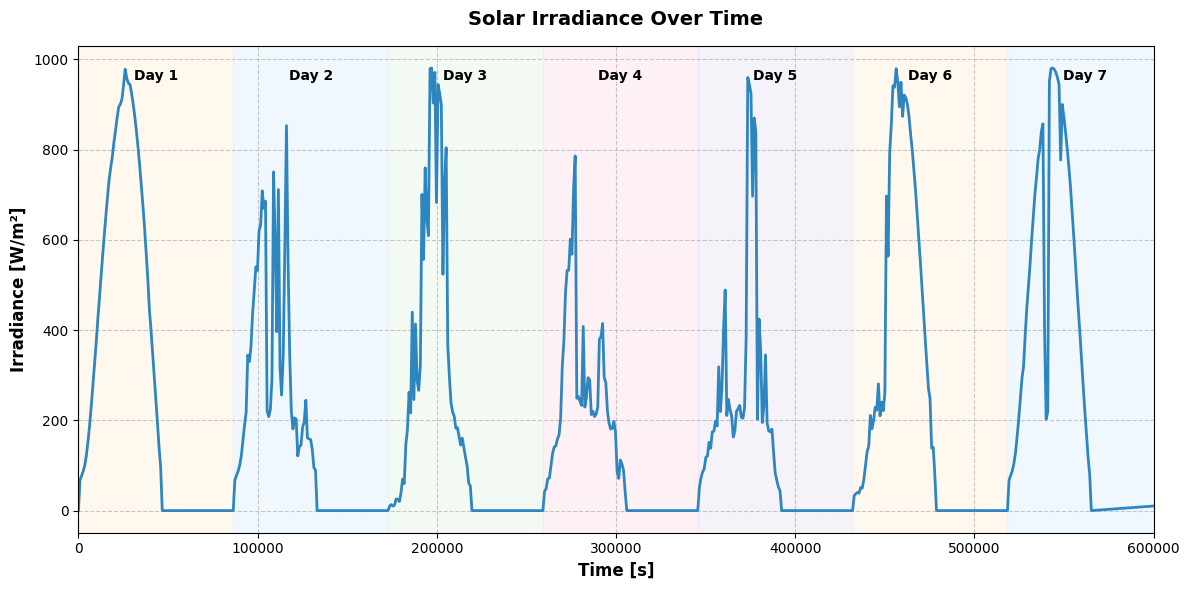

In [7]:
# Display the first six days
BEGIN, END = 0, int(6 * 86_400 / 900)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot main data
ax.plot(timestamp[BEGIN:END], irradiance[BEGIN:END], 
        label='Irradiance', 
        color='#2E86C1', 
        linewidth=2)

# Add colored backgrounds and labels for each day
colors = ['#FFF3E0', '#E3F2FD', '#E8F5E9', '#FCE4EC', '#EDE7F6']
seconds_per_day = 86_400

for day in range(((END * 900) // seconds_per_day) + 1):
    day_start = day * seconds_per_day
    day_end = (day + 1) * seconds_per_day
    
    # Add colored background
    ax.axvspan(day_start, day_end, 
               color=colors[day % len(colors)], 
               alpha=0.5,
               label=f'Day {day+1}')
    
    # Add day label
    ax.text((day_start + day_end)/2, ax.get_ylim()[1]*0.95,
            f'Day {day+1}',
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=10,
            fontweight='bold')

# Customize appearance
ax.set_xlabel('Time [s]', fontsize=12, fontweight='bold')
ax.set_ylabel('Irradiance [W/m²]', fontsize=12, fontweight='bold')
ax.set_title('Solar Irradiance Over Time', fontsize=14, pad=15, fontweight='bold')

# Add grid and legend
ax.grid(True, which='major', linestyle='--', alpha=0.7)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim(0, 600_000)

plt.tight_layout()
plt.show()

# PV Panel Datasheet Digitalization

![](datasheet/PVcell/datasheet.bmp)

The [plotdigitizer](https://plotdigitizer.com/app) is easy to use and suggested. Any other software can be used to digitize the datasheet.

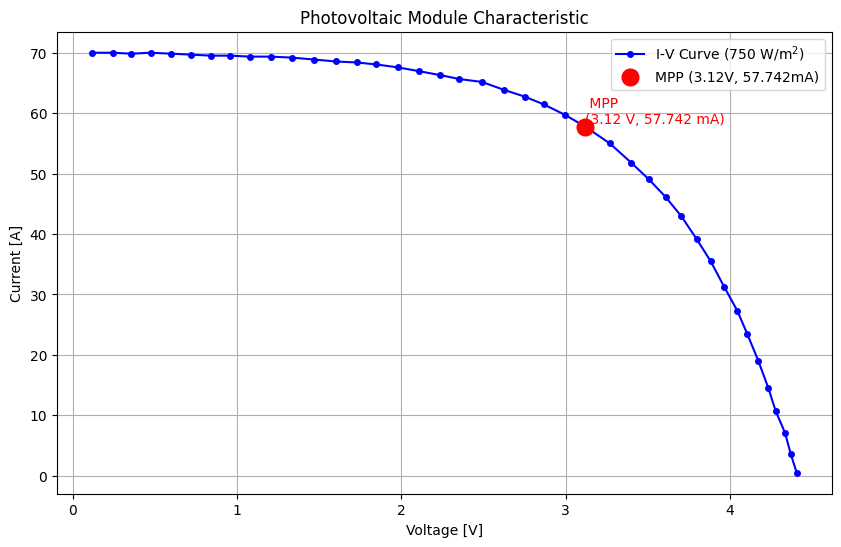

Irradiance: 750 W/m^2
MPP Voltage: 3.1199 V
MPP Current: 57.7419 mA
Max Power: 180.1502


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 设置配置
filename = './samples/1000w.txt'  # 你的文件路径
g = 750                     # 对应的光照强度

# 2. 读取数据
try:
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    voltage_raw = data[:, 0]
    current_raw = data[:, 1]
except Exception as e:
    # 如果找不到文件，这里生成一些模拟数据方便演示代码效果
    print(f"警告: 没找到文件 {filename}，使用模拟数据演示。")
    voltage_raw = np.array([0.5, 3.0, 1.0, 3.2, 1.5, 3.4, 2.0, 0.0, 2.5, 2.8, 3.5])
    current_raw = np.array([0.03, 0.024, 0.03, 0.015, 0.03, 0.005, 0.029, 0.03, 0.028, 0.026, 0.0])

# 3. 排序 (解决曲线乱跑的问题)
sort_indices = np.argsort(voltage_raw)
x_sorted = voltage_raw[sort_indices]
y_sorted = current_raw[sort_indices]

# 4. 计算 MPP
power = x_sorted * y_sorted
max_idx = np.argmax(power) # 找到最大功率的索引

v_mpp = x_sorted[max_idx]
i_mpp = y_sorted[max_idx]
max_p = power[max_idx]

# ================= 绘图部分 =================
plt.figure(figsize=(10, 6))

# 第一步：画蓝色的曲线
# 'b-o' 意思是 blue(蓝色) line(-) with circle marker(o)
plt.plot(x_sorted, y_sorted, 'b-o', label=f'I-V Curve ({g} W/m$^2$)', markersize=4)

# 第二步：画红色的 MPP 点
# 'ro' 意思是 red(红色) circle(圆点)
# markersize=10 把点画大一点，显眼
plt.plot(v_mpp, i_mpp, 'ro', markersize=12, label=f'MPP ({v_mpp:.2f}V, {i_mpp:.3f}mA)')
# 标注 MPP 点
plt.text(v_mpp, i_mpp, f' MPP\n({v_mpp:.2f} V, {i_mpp:.3f} mA)', 
         fontsize=10, color='red', verticalalignment='bottom')

plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.title(f'Photovoltaic Module Characteristic')
plt.legend()
plt.grid(True)
plt.show()

# ================= 打印结果 =================
print(f"Irradiance: {g} W/m^2")
print(f"MPP Voltage: {v_mpp:.4f} V")
print(f"MPP Current: {i_mpp:.4f} mA")
print(f"Max Power: {power.max():.4f}")

# DC-DC Converter Datasheet Digitalization

![](datasheet/PV_DCDCconv/efficiency.jpeg)

=== Copy these lines to inc/config_converter_pv.h ===

#define SIZE_CONV_PV 24
static const double V_CONV_PV[SIZE_CONV_PV] = { 0.6459, 0.6773, 0.7864, 0.8749, 1.0136, 1.1997, 1.5119, 1.7951, 1.9824, 2.2697, 2.5861, 2.6361, 2.6819, 2.7277, 2.7569, 2.7860, 2.9937, 3.2765, 3.4801, 3.6527, 3.8761, 4.1871, 4.6905, 4.9790 };
static const double ETA_CONV_PV[SIZE_CONV_PV] = { 64.6824, 67.1739, 71.6304, 76.4808, 80.6522, 83.8485, 85.0931, 85.8398, 85.8896, 88.1298, 90.3700, 85.5909, 80.6127, 75.5847, 71.3532, 68.4161, 68.6417, 67.3568, 65.4633, 63.1640, 60.7971, 56.9086, 51.3971, 47.6439 };

正在生成预览图...


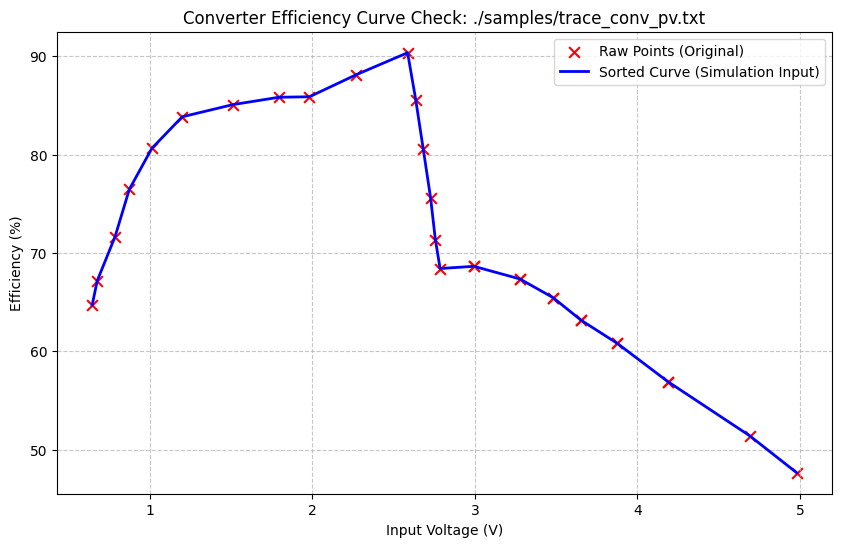

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # <--- 新增：引入绘图库

# --- 配置区域 ---
# 假设你的文件名为 'trace_conv_pv.txt'
FILE_NAME = './samples/trace_conv_pv.txt' 

try:
    # 1. 读取数据
    # header=None 如果文件没有标题行 (第一行就是数据)
    # header=0 如果文件第一行是标题 (x, y)
    # 这里假设你的文件像之前一样有标题 "x, y"
    df = pd.read_csv(FILE_NAME, delimiter=',')
    
    # 去除列名空格并重命名
    df.columns = [c.strip() for c in df.columns] 
    df.columns = ['V', 'Eta']

    # 2. 数据清洗
    # SystemC 要求输入 (X轴) 必须严格单调递增，所以必须排序
    df_sorted = df.sort_values(by='V')
    
    # 去除完全重复的行
    df_sorted = df_sorted.drop_duplicates()
    
    # 重置索引 (可选，方便调试)
    df_sorted = df_sorted.reset_index(drop=True)

    # 3. 生成 C++ 代码
    v_array = df_sorted['V'].values
    eta_array = df_sorted['Eta'].values
    size = len(v_array)

    print("=== Copy these lines to inc/config_converter_pv.h ===\n")
    print(f"#define SIZE_CONV_PV {size}")
    
    # 格式化输出，保留4位小数
    v_str = ", ".join([f"{x:.4f}" for x in v_array])
    print(f"static const double V_CONV_PV[SIZE_CONV_PV] = {{ {v_str} }};")
    
    eta_str = ", ".join([f"{x:.4f}" for x in eta_array])
    print(f"static const double ETA_CONV_PV[SIZE_CONV_PV] = {{ {eta_str} }};")
    print("\n==================================================")

    # 4. 可视化绘图 (新增功能)
    print("正在生成预览图...")
    plt.figure(figsize=(10, 6))
    
    # 绘制原始数据点 (用红色散点表示，检查是否有离群点)
    # 如果原始数据很乱，这里的红点会散落在蓝线周围
    plt.scatter(df['V'], df['Eta'], color='red', marker='x', s=60, label='Raw Points (Original)')
    
    # 绘制处理后的曲线 (用蓝色实线表示，这是仿真器实际“看到”的曲线)
    plt.plot(df_sorted['V'], df_sorted['Eta'], color='blue', linewidth=2, label='Sorted Curve (Simulation Input)')
    
    plt.title(f'Converter Efficiency Curve Check: {FILE_NAME}')
    plt.xlabel('Input Voltage (V)')
    plt.ylabel('Efficiency (%)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 显示图表
    plt.show()
    
except FileNotFoundError:
    print(f"错误: 找不到文件 {FILE_NAME}，请确保文件已上传且路径正确。")
except Exception as e:
    print(f"发生错误: {e}")

![](datasheet/Battery_DCDCconv/dcdc_fig.jpg)

=== Copy these lines to inc/config_converter_battery.h ===

#define SIZE_CONV_BATT 26
static const double I_CONV_BATT[SIZE_CONV_BATT] = { 0.0138, 0.0172, 0.0214, 0.0268, 0.0322, 0.0388, 0.0486, 0.0633, 0.0797, 0.1046, 0.1311, 0.1753, 0.2515, 0.3778, 0.6282, 1.0561, 1.8965, 3.1883, 5.0594, 9.0111, 15.9172, 27.8855, 50.4911, 89.1882, 142.7007, 262.6783 };
static const double ETA_CONV_BATT[SIZE_CONV_BATT] = { 31.5284, 37.0693, 41.8691, 46.8652, 51.2800, 55.1146, 59.6769, 64.2934, 68.5081, 73.1237, 76.9252, 80.3274, 83.4401, 85.6721, 87.9281, 89.3758, 90.2445, 90.6064, 90.8959, 91.3303, 91.4750, 91.4750, 91.3303, 91.4750, 92.4161, 93.6467 };

正在生成预览图...


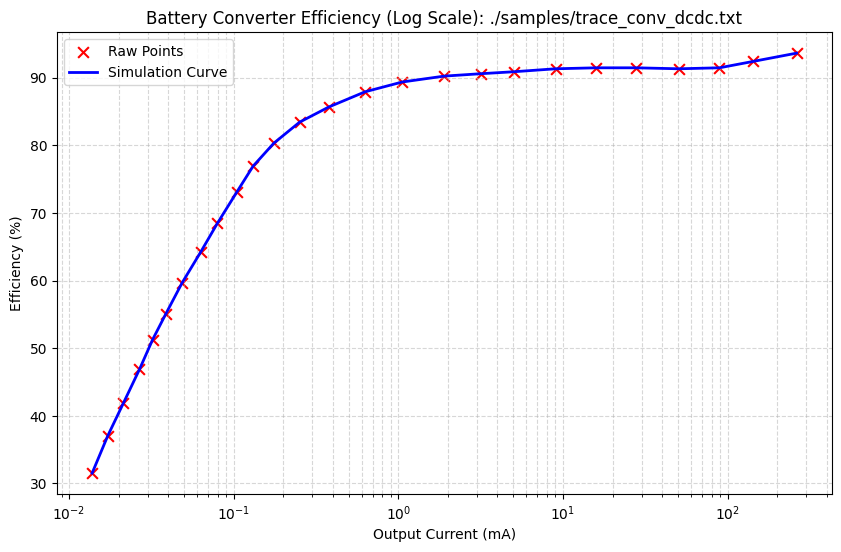

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # <--- 引入绘图库

# --- 配置区域 ---
# 把这里改成你的电池转换器数据文件名 (记得保存为 csv/txt)
FILE_NAME = './samples/trace_conv_dcdc.txt' 

try:
    # 1. 读取数据 (假设格式还是 x, y)
    df = pd.read_csv(FILE_NAME, delimiter=',')
    
    # 去除列名空格
    df.columns = [c.strip() for c in df.columns] 
    
    # 重命名列: Battery 的 X 是 Current (I), Y 是 Efficiency (Eta)
    df.columns = ['I', 'Eta']

    # 2. 数据清洗
    # 按电流 (I) 排序 - SystemC 必须要求单调递增
    df_sorted = df.sort_values(by='I')
    
    # 去重
    df_sorted = df_sorted.drop_duplicates()
    
    # 重置索引
    df_sorted = df_sorted.reset_index(drop=True)

    # 3. 生成 C++ 代码 (注意变量名变化)
    i_array = df_sorted['I'].values
    eta_array = df_sorted['Eta'].values
    size = len(i_array)

    print("=== Copy these lines to inc/config_converter_battery.h ===\n")
    
    # 修改点 1: 宏定义名称
    print(f"#define SIZE_CONV_BATT {size}")
    
    # 修改点 2: 电流数组 I_CONV_BATT
    # 注意: 确认你的 txt 里 X 轴数据的单位是 mA。如果是 A，这里需要 * 1000
    i_str = ", ".join([f"{x:.4f}" for x in i_array])
    print(f"static const double I_CONV_BATT[SIZE_CONV_BATT] = {{ {i_str} }};")
    
    # 修改点 3: 效率数组 ETA_CONV_BATT
    eta_str = ", ".join([f"{x:.4f}" for x in eta_array])
    print(f"static const double ETA_CONV_BATT[SIZE_CONV_BATT] = {{ {eta_str} }};")

    print("\n========================================================")

    # --- 4. 可视化绘图区域 (新增) ---
    print("正在生成预览图...")
    plt.figure(figsize=(10, 6))
    
    # A. 绘制原始散点 (红叉)
    plt.scatter(df['I'], df['Eta'], color='red', marker='x', s=60, label='Raw Points')
    
    # B. 绘制排序后的曲线 (蓝线)
    plt.plot(df_sorted['I'], df_sorted['Eta'], color='blue', linewidth=2, label='Simulation Curve')
    
    # C. 设置对数坐标 (关键!)
    # 因为电池电流跨度大 (0.01mA 到 100mA)，用对数坐标看才清楚
    plt.xscale('log') 
    
    plt.title(f'Battery Converter Efficiency (Log Scale): {FILE_NAME}')
    plt.xlabel('Output Current (mA)')
    plt.ylabel('Efficiency (%)')
    plt.grid(True, which="both", linestyle='--', alpha=0.5) # grid both 对应对数网格
    plt.legend()
    
    plt.show()
    
except FileNotFoundError:
    print(f"错误: 找不到文件 {FILE_NAME}")
except Exception as e:
    print(f"发生错误: {e}")

# Battery model

![](datasheet/Battery/datasheet.jpg)

In [11]:
from scipy.interpolate import interp1d

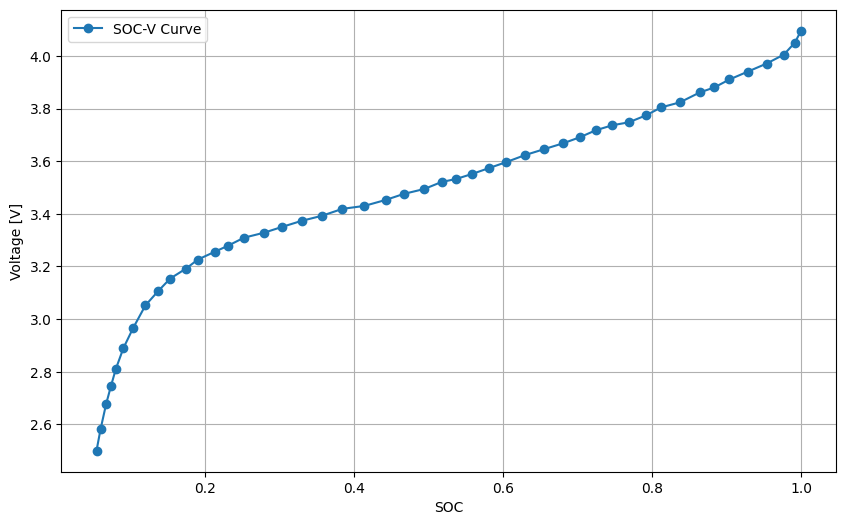

In [21]:
# Extract digitalized points
data = np.loadtxt('./samples/0.5c.txt', delimiter=',', skiprows=1)
voltage = data[:, 0]
soc = data[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage, soc, 'o-', label='SOC-V Curve')
plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate
newX = np.linspace(0, 1, 100)
interp_func = interp1d(soc, voltage, bounds_error=False)
newY = interp_func(newX)


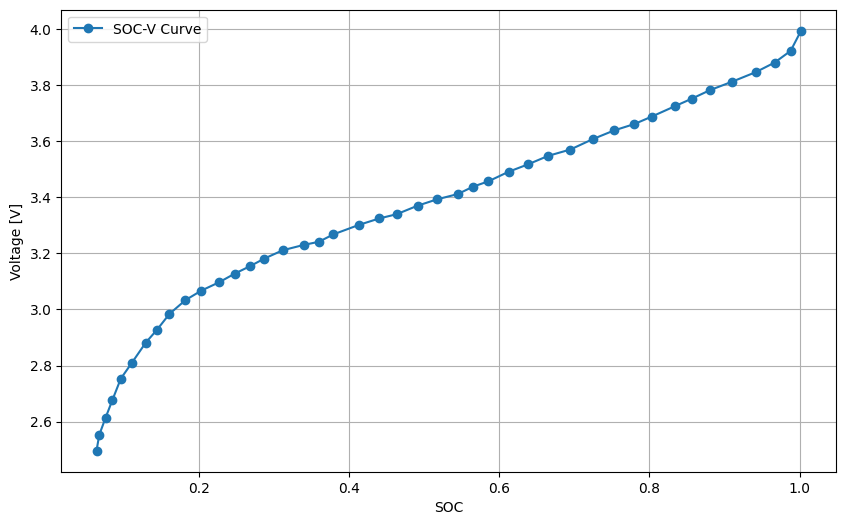

In [22]:
# Do the same for another curve
# TODO
# Extract digitalized points
data = np.loadtxt('./samples/1c.txt', delimiter=',', skiprows=1)
voltage = data[:, 0]
soc = data[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage, soc, 'o-', label='SOC-V Curve')
plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate
newX = np.linspace(0, 1, 100)
interp_func = interp1d(soc, voltage, bounds_error=False)
newY = interp_func(newX)


### How to use `curve_fit`

In [25]:
from scipy.optimize import curve_fit

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# 1. 加载数据
data_1c = np.loadtxt('./samples/1c.txt', delimiter=',') # 假设逗号分隔
data_05c = np.loadtxt('./samples/0.5c.txt', delimiter=',')

# 2. 转换 X 轴 (Capacity -> SOC)
# 假设 Capacity 满是 3200mAh。
# 放电容量为 0 时，SOC 为 1；放电容量为 3200 时，SOC 为 0。
# 公式: SOC = 1 - (Capacity / 3200)
soc_1c = 1 - (data_1c[:, 0] / 3200)
print("soc_1c:", soc_1c)
print("data_1c[:,0]:", data_1c[:,0])

v_1c = data_1c[:, 1]

soc_05c = 1 - (data_05c[:, 0] / 3200)
v_05c = data_05c[:, 1]

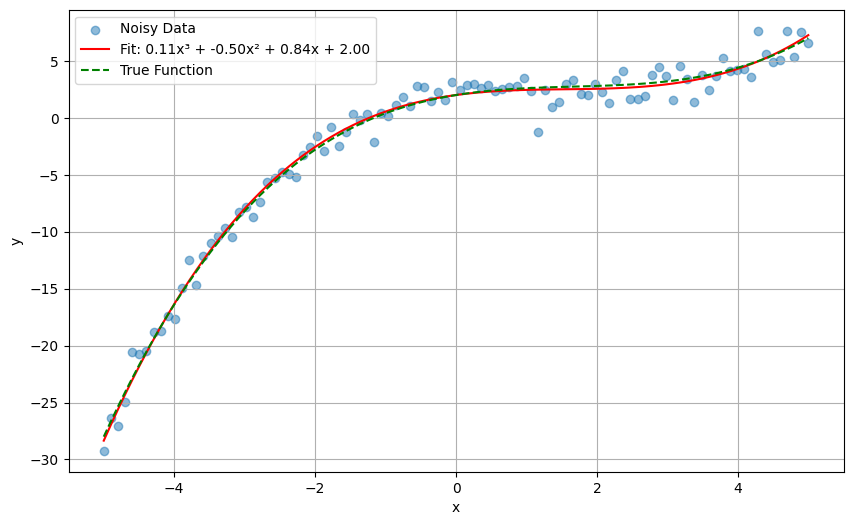

In [26]:
# Define polynomial function (3rd degree)
def poly_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Generate data
x_data = np.linspace(-5, 5, 100)
true_params = [0.1, -0.5, 1.0, 2.0]  # True coefficients
y_true = poly_func(x_data, *true_params)
noise = np.random.normal(0, 1, len(x_data))
y_data = y_true + noise

# Fit the data
popt, pcov = curve_fit(poly_func, x_data, y_data)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.5, label='Noisy Data')
plt.plot(x_data, poly_func(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}x³ + {popt[1]:.2f}x² + {popt[2]:.2f}x + {popt[3]:.2f}')
plt.plot(x_data, y_true, 'g--', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define exponential decay function
def exp_decay(x, A, k, c):
    return A * np.exp(-k * x) + c

# Generate data
x_data = np.linspace(0, 10, 100)
true_params = [10.0, 0.5, 1.0]  # [amplitude, decay rate, offset]
y_true = exp_decay(x_data, *true_params)
noise = np.random.normal(0, 0.5, len(x_data))
y_data = y_true + noise

# Fit the data
popt, pcov = curve_fit(exp_decay, x_data, y_data)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.5, label='Noisy Data')
plt.plot(x_data, exp_decay(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}*exp(-{popt[1]:.2f}x) + {popt[2]:.2f}')
plt.plot(x_data, y_true, 'g--', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Overfitting Example

In [ ]:
# Define high degree polynomial for overfitting
def complex_func(x, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9):
    return (a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + 
            a5*x**5 + a6*x**6 + a7*x**7 + a8*x**8 + a9*x**9)

# Generate more points with higher noise
x_data = np.linspace(0, 10, 30)  # Increased to 30 points
true_params = [1.0, 0.5]
y_true = true_params[0] + true_params[1] * x_data
noise = np.random.normal(0, 0.5, len(x_data))  # Increased noise standard deviation to 0.5
y_data = y_true + noise

# Fit with overly complex function
initial_guess = np.ones(10)
popt, pcov = curve_fit(complex_func, x_data, y_data, p0=initial_guess)

# Generate smooth points for plotting
x_smooth = np.linspace(0, 10, 1000)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', s=50, alpha=0.6, label='Noisy Data')
plt.plot(x_smooth, complex_func(x_smooth, *popt), 'r-', 
         label='Overfitted (9th degree)')
plt.plot(x_smooth, true_params[0] + true_params[1]*x_smooth, 'g--',
         label='True Linear Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Overfitting with Noisy Data')
plt.grid(True)
plt.show()

In [ ]:
# Fit the data to obtain V_OC(SOC)
# TODO

In [ ]:
# Fit the data to obtain R(SOC)
# TODO